# Step 5: Output Evaluation

In [1]:
# Imports
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

## Load Output

### NMA Output (From step 4)

In [ ]:
# Load the distance profiles dictionary from a file
with open('data/nma_distance_profiles_dict.pkl', 'rb') as f:
    distance_profiles = pickle.load(f)

### Combined Near Miss Sequences Dataframe (From step 3)


In [ ]:
# load windows_df
windows_df = pd.read_csv('data/df_near_miss_windows_combined1')

## Normals Plots
- Look at distribution of min_distance values

In [ ]:
# Create a DataFrame to hold the all the same information except the distance profile
distance_profiles_df = pd.DataFrame({
    'trip_num': [result['trip_num'] for result in distance_profiles],
    'query_num': [result['query_num'] for result in distance_profiles],
    'min_distance': [result['min_distance'] for result in distance_profiles]
})

### Individual Near Miss Sequences
- Look at distribution of min_distance values for a given query

In [ ]:
# Select a query number
query_num = 7

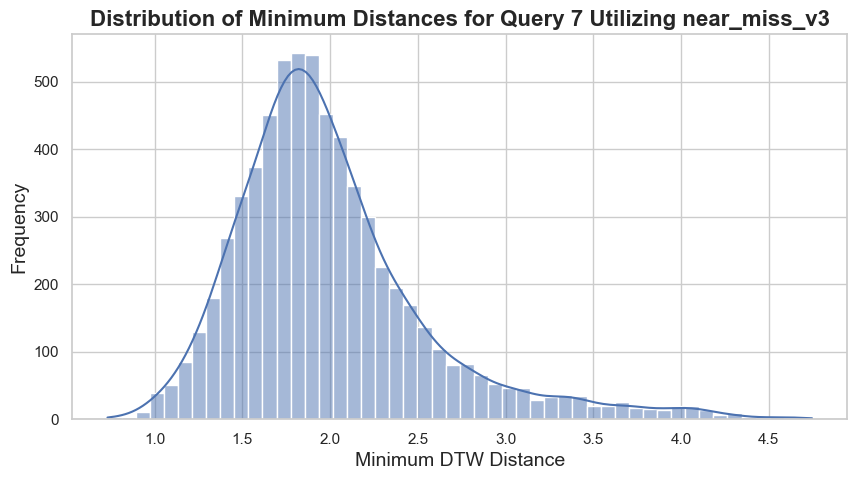

In [ ]:
# Filter the distance profiles for the given query in the distance_profiles dicitionary
distance_profiles_query = distance_profiles_df[distance_profiles_df['query_num'] == query_num]

# Sort the distance profiles for the given query
distance_profiles_query_sorted = distance_profiles_query.sort_values('min_distance')

# Plot a histogram of the minimum Euclidean distances for the given query
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(distance_profiles_query_sorted['min_distance'], bins=50, kde=True)
plt.title(f'Distribution of Minimum Distances for Query {query_num} Utilizing near_miss_v3', fontsize=16, fontweight='bold')
plt.xlabel('Minimum DTW Distance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
# plt.xlim(0, 25)  # Set x-axis range between 0 and 25
plt.show()

### For all queries

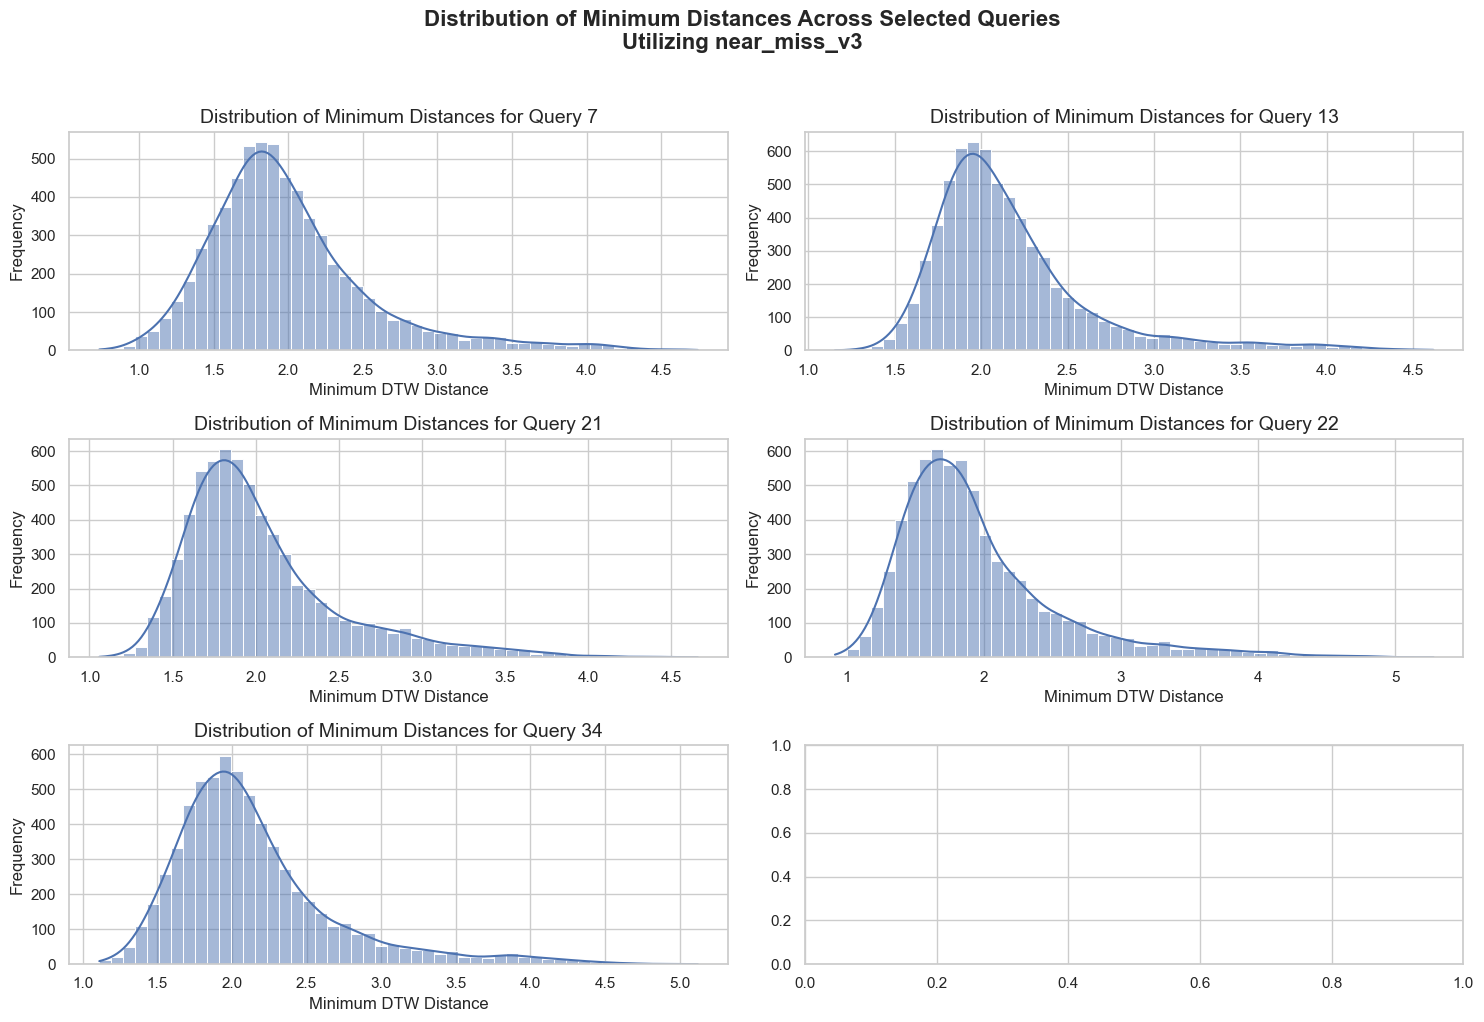

In [ ]:
query_nums = windows_df['query_num'].unique()

rows = int(np.ceil(len(query_nums) / 2))
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 10))
axes = axes.flatten()



# Add overall title
fig.suptitle('Distribution of Minimum Distances Across Selected Queries\nUtilizing near_miss_v3', fontsize=16, fontweight='bold', y=1.02)

for i, query_num in enumerate(query_nums):
    distance_profiles_query = distance_profiles_df[distance_profiles_df['query_num'] == query_num]
    sns.histplot(distance_profiles_query['min_distance'], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Minimum Distances for Query {query_num}', fontsize=14)
    axes[i].set_xlabel('Minimum DTW Distance', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)
    # axes[i].set_xlim(0, 25)  # Set x-axis range between 0 and 25
plt.tight_layout()

# Show the plots
plt.show()